In [10]:
# Logistic regression from scratch...
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

In [11]:
import numpy as np
import math
from statsmodels.tools.tools import add_constant
import pandas as pd

In [12]:
X = np.array([[0,2,5],
              [3,1,6],
              [7,8, 10],
              [9,10, 22],
              [12, 33, 22],
              [0.8,  14, 41]])
Theta  = np.zeros(X.shape[1]+1) # number of features + 1 to model constant.
X = add_constant(X)
y = np.array([1,0,0,1, 1, 0])

def sigmoid(z):
  return 1/(  1 +  np.exp(-z))

def predict(Theta, X):
  return sigmoid(X @ Theta)

def gradient(Theta, X, y):
  return (1/X.shape[0]) * ( X.T @ (predict(Theta, X) - y))

In [13]:
def GDS(max_iterations, initial_value, gradient,
        learning_rate=0.001,
        error_max=0.00000001):
  iterations = 0
  error = np.array([1])
  theta_temp = initial_value.copy()
  while iterations < max_iterations and (error > error_max).any():
    theta_ = theta_temp.copy()
    theta_temp = theta_temp - gradient(theta_temp)*learning_rate
    error = abs(theta_ - theta_temp)
    iterations +=1 # Save the number of iterations
  return theta_temp, iterations

In [14]:
GDS(max_iterations=100000,
    initial_value = np.zeros(X.shape[1]),
    gradient = lambda theta: gradient(theta, X,y))

(array([-0.17486772,  0.02056657,  0.16158727, -0.08676071]), 100000)

In [15]:
import statsmodels.api as sm
log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.554109
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                    6
Model:                          Logit   Df Residuals:                        2
Method:                           MLE   Df Model:                            3
Date:                Fri, 13 Sep 2024   Pseudo R-squ.:                  0.2006
Time:                        15:15:30   Log-Likelihood:                -3.3247
converged:                       True   LL-Null:                       -4.1589
Covariance Type:            nonrobust   LLR p-value:                    0.6440
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1761      1.829     -0.096      0.923      -3.761       3.408
x1             0.0207      0.

In [16]:
import matplotlib.pyplot as plt

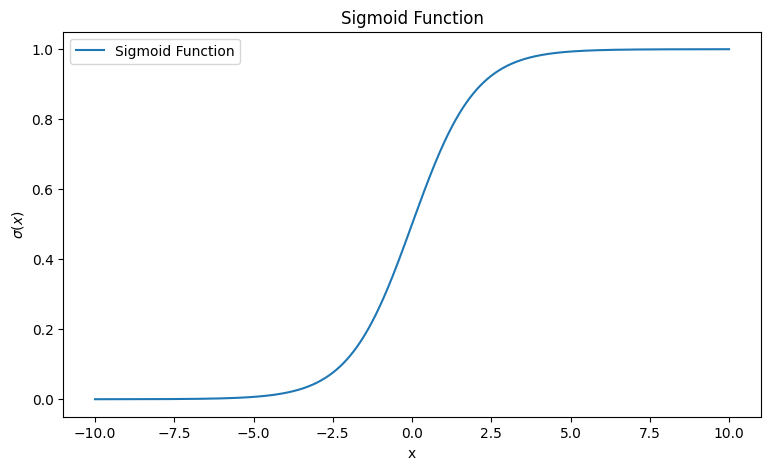

<Figure size 640x480 with 0 Axes>

In [33]:
plt.figure(figsize=(9
, 5))
x = np.linspace(-10, 10, 1000000)
plt.plot(x, sigmoid(x), label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('$σ(x)$')
plt.legend()
plt.show()
plt.savefig("")